<a href="https://colab.research.google.com/github/Shohail786/Cat-and-Non-Cat-classification/blob/main/cat_%26_non_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

Keys: <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
209
209


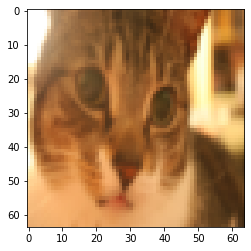

In [11]:
import h5py
import numpy as np
file_name="/content/drive/MyDrive/DataSet_cat&non-cat/train_catvnoncat.h5"
with h5py.File(file_name, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
import matplotlib.pyplot as plt
train_dataset = h5py.File(file_name, "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
train_z_orig = np.array(train_dataset["list_classes"][:])
index = 200
plt.imshow(train_x_orig[index])
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
print(m_train)
print(train_y_orig.shape[0])

In [9]:
print(a_group_key)

list_classes


In [3]:
trainfile="/content/drive/MyDrive/DataSet_cat&non-cat/train_catvnoncat.h5"
testfile="/content/drive/MyDrive/DataSet_cat&non-cat/test_catvnoncat.h5"

In [12]:
def load_dataset():
  train_dataset=h5py.File(trainfile,"r")
  train_set_x_orig=np.array(train_dataset["train_set_x"][:])
  train_set_y_orig=np.array(train_dataset["train_set_y"][:])
  train_set_y_orig=train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
  test_dataset=h5py.File(testfile,'r')
  test_set_x_orig=np.array(test_dataset["test_set_x"][:])
  test_set_y_orig=np.array(test_dataset["test_set_y"][:])
  test_set_y_orig=test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
  classes=np.array(test_dataset["list_classes"][:])
  return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes


In [13]:
train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes=load_dataset()

y=[1] , it's a cat picture


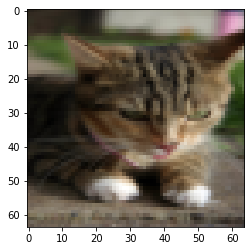

In [20]:
index=104
plt.imshow(train_set_x_orig[index])
print("y="+str(train_set_y_orig[:,index])+" , it's a "+classes[np.squeeze(train_set_y_orig[:,index])].decode("utf-8")+" picture")

In [21]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
img_dim=train_set_x_orig.shape[1]
print("m_train: "+str(m_train))
print("m_test: "+str(m_test))
print("img_dim: "+str(img_dim))

m_train: 209
m_test: 50
img_dim: 64


In [29]:
#flatten the image dim to a vector (img_dim*img_dim*3,1)
train_set_x_flatten=train_set_x_orig.reshape(m_train,-1).T
print(train_set_x_flatten.shape)
test_set_x_flatten=test_set_x_orig.reshape(m_test,-1).T
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [37]:
#standardize the dataset or preprocess
#image divide by 255
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255


In [38]:
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

In [45]:
print(sigmoid(np.array([5,2,4])))

[0.99330715 0.88079708 0.98201379]


In [46]:
#zero initialize
def initZero(dim):
  w=np.zeros((dim,1),dtype=float)
  b=float(0.0)
  return w,b


In [47]:
dim=3
w,b=initZero(dim)
print("w="+str(w))
print("b="+str(b))

w=[[0.]
 [0.]
 [0.]]
b=0.0


In [56]:
def forward_prop(w,b,X,Y):
  m=X.shape[1]
  z=np.dot(w.T,X)+b
  A=1/(1+np.exp(-z))
  cost=(-1/m)*np.sum(np.dot(Y,np.log(A).T)+np.dot((1-Y),np.log(1-A).T))
  cost=np.squeeze(np.array(cost))
  return A,cost


In [63]:
def backward_prop(X,A,Y):
  m=X.shape[1]
  dw=(1/m)*np.dot(X,(A-Y).T)
  db=(1/m)*np.sum((A-Y).T)
  grads={"dw": dw,"db":db}
  return grads


In [64]:
w=np.array([[1.],[2]])
b=1.5
X=np.array([[1.,-2.,-1.],[3.,0.5,-3.2]])
Y=np.array([[1,1,0]])
A,cost=forward_prop(w,b,X,Y)
grads=backward_prop(X,A,Y)
print("dw=" +str(grads["dw"]))
print("db="+str(grads["db"]))

dw=[[ 0.25071532]
 [-0.06604096]]
db=-0.1250040450043965


In [74]:
#optimize minimize the lost function through the params w,b
import copy
def optimizer(w,b,X,Y,num_it=100,lr=0.009,print_cost=False):
    w=copy.deepcopy(w)
    b=copy.deepcopy(b)
    costs=[]
    for i in range(num_it):
      A,cost=forward_prop(w,b,X,Y)
      grads=backward_prop(X,A,Y)
      dw=grads["dw"]
      db=grads["db"]
      w=w-lr*dw
      b=b-lr*db
      if i%100==0:
        costs.append(cost)
        if print_cost: print("Cost after iteration %i:%f" %(i,cost))
    params={"w":w,"b":b}
    grads={"dw":dw,"db":db}
    return params,grads,costs



In [77]:
params,grads,cost=optimizer(w,b,X,Y,num_it=100,lr=0.009,print_cost=True)
print("w= "+str(params["w"]))
print("b= "+str(params["b"]))
print("dw= "+str(grads["dw"]))
print("db= "+str(grads["db"]))

Cost after iteration 0:0.159005
w= [[0.80956046]
 [2.0508202 ]]
b= 1.5948713189708588
dw= [[ 0.17860505]
 [-0.04840656]]
db= -0.08888460336847771


In [78]:
#prediction
def predict(w,b,X):
  m=X.shape[1]
  Y_pred=np.zeros((1,m))
  w=w.reshape(X.shape[0],1)
  z=np.dot(w.T,X)+b
  A=1/(1+np.exp(-z))
  for i in range(A.shape[1]):
    if(A[0,i])>0.5:
      Y_pred[0,i]=1
    else:
      Y_pred[0,i]=0
  return Y_pred


In [79]:
w=np.array([[0.1124],[0.2310]])
b=-0.3
X=np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print("prediction= "+str(predict(w,b,X)))

prediction= [[1. 1. 0.]]


In [96]:
def model(X_train,Y_train,X_test,Y_test,num_it=2000,lr=0.5,print_cost=False):
  w,b=initZero(X_train.shape[0])
  params,grads,costs=optimizer(w,b,X_train,Y_train,num_it,lr,print_cost)
  w=params["w"]
  b=params["b"]
  Y_pred_train=predict(w,b,X_train)
  Y_pred_test=predict(w,b,X_test)
  if  print_cost:
    print("train accuracy: {}%".format(100-np.mean(np.abs(Y_pred_train-Y_train)*100)))
    print("test accuracy: {}%". format(100-np.mean(np.abs(Y_pred_test-Y_test))*100))
  d={"costs" : costs,"Y_pred_train":Y_pred_train,"Y_pred_test":Y_pred_test,
     "w" :w,"b":b,"learning_rate":lr,"num_itr":num_it}
  return d


In [97]:
logistic_reg_model=model(train_set_x,train_set_y_orig,test_set_x,test_set_y_orig,num_it=2000,lr=0.005,print_cost=True)

Cost after iteration 0:0.693147
Cost after iteration 100:0.584508
Cost after iteration 200:0.466949
Cost after iteration 300:0.376007
Cost after iteration 400:0.331463
Cost after iteration 500:0.303273
Cost after iteration 600:0.279880
Cost after iteration 700:0.260042
Cost after iteration 800:0.242941
Cost after iteration 900:0.228004
Cost after iteration 1000:0.214820
Cost after iteration 1100:0.203078
Cost after iteration 1200:0.192544
Cost after iteration 1300:0.183033
Cost after iteration 1400:0.174399
Cost after iteration 1500:0.166521
Cost after iteration 1600:0.159305
Cost after iteration 1700:0.152667
Cost after iteration 1800:0.146542
Cost after iteration 1900:0.140872
train accuracy: 99.04306220095694%
test accuracy: 70.0%


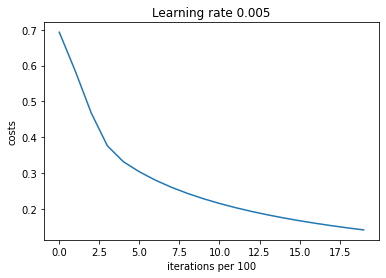

In [98]:
#plot
import matplotlib.pyplot as plt
costs=np.squeeze(logistic_reg_model['costs'])
plt.plot(costs)
plt.ylabel('costs')
plt.xlabel('iterations per 100')
plt.title("Learning rate "+str(logistic_reg_model['learning_rate']))
plt.show()

learning_rate : 0.01

----------------------------------
learning_rate : 0.001

----------------------------------
learning_rate : 0.0001

----------------------------------


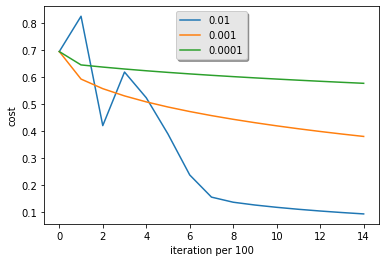

In [105]:
#plot for different learning rate
learning_rate=[0.01,0.001,0.0001]
models={}
for lr in learning_rate:
  print("learning_rate : "+str(lr))
  models[str(lr)]=model(train_set_x,train_set_y_orig,test_set_x,test_set_y_orig,num_it=1500,lr=lr,print_cost=False)
  print('\n'+"----------------------------------")
for lr in learning_rate:
  plt.plot(np.squeeze(models[str(lr)]["costs"]),label=str(models[str(lr)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iteration per 100')
legend=plt.legend(loc='upper center',shadow=True)
frame=legend.get_frame()
frame.set_facecolor('0.9')
plt.show()

y= 1.0, this a cat


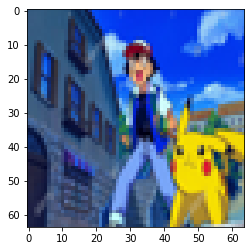

In [113]:
from PIL import Image
from scipy import ndimage
fname="/content/drive/MyDrive/DataSet_cat&non-cat/Capture2.JPG"
image=np.array(Image.open(fname).resize((img_dim,img_dim)))
plt.imshow(image)
image=image/255.
image=image.reshape((1,img_dim*img_dim*3)).T
pred_img=predict(logistic_reg_model["w"],logistic_reg_model["b"],image)
print("y= "+str(np.squeeze(pred_img))+", this a "+classes[int(np.squeeze(pred_img)),].decode("utf-8"))